In [ ]:
# Import Libraries 
%matplotlib notebook
from plantcv import plantcv as pcv
from plantcv.parallel import workflow_inputs
import matplotlib
from  matplotlib import pyplot as plt
get_ipython().run_line_magic('matplotlib', 'notebook')

# Set global debug behavior to None (default), "print" (to file), 
# or "plot" (Jupyter Notebooks or X11)
pcv.params.debug = "plot"

class options:
    def __init__(self):
        self.debug = "plot"
        self.writeimg= False
        self.result = "color_tutorial_results.json"
        self.outdir = "./Matrix_Folder"
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

In [1]:
#Import images for color correction. Target image is the image to which the workflow is being corrected, while source image is being corrected to the target image. Inputs are the filepath to the images you're analyzing. Color correction on this workflow is optional.

target_img, t_path, t_filename = pcv.readimage(filename="/shares/mgehan_share/raw_data/raw_image/b5-project-images/e01-2023-07-camelina-germination/extracted-image-data/10.9.1.88_159-001-001_R1_C12-Suneson-C14-C16-C10/C12-Suneson-C14-C16-C10_10.9.1.88_pos-159-001-001_2023-07-17-15-05.jpg")
source_img, s_path, s_filename = pcv.readimage(filename="/shares/mgehan_share/raw_data/raw_image/b5-project-images/e01-2023-07-camelina-germination/extracted-image-data/10.9.1.88_159-001-001_R1_C12-Suneson-C14-C16-C10/C12-Suneson-C14-C16-C10_10.9.1.88_pos-159-001-001_2023-07-31-13-05.jpg")

NameError: name 'pcv' is not defined

In [2]:
#Find color card

dataframe1, start, space = pcv.transform.find_color_card(rgb_img=target_img, background='light')

NameError: name 'pcv' is not defined

<IPython.core.display.Javascript object>


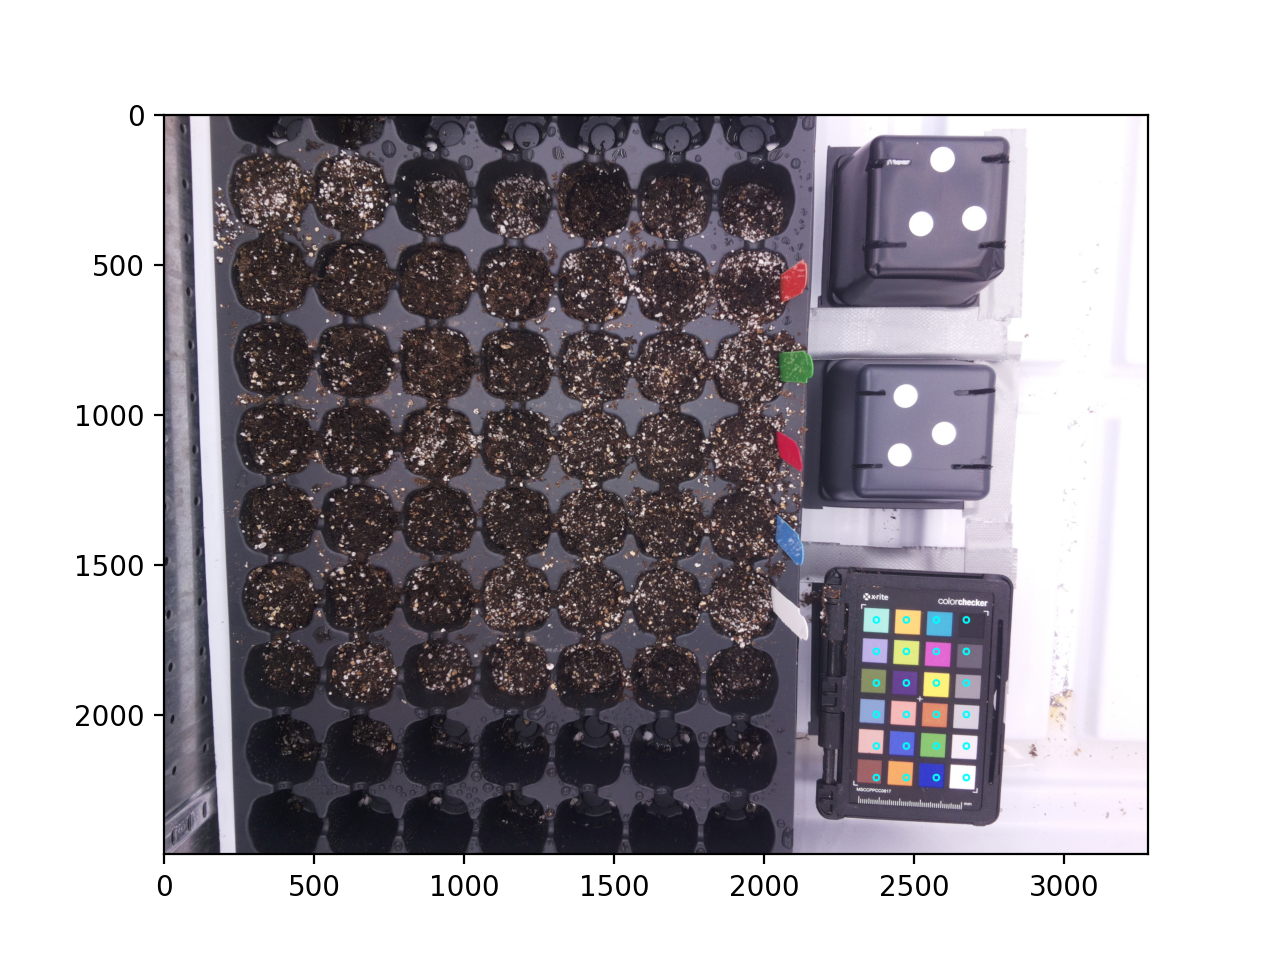

<IPython.core.display.Javascript object>


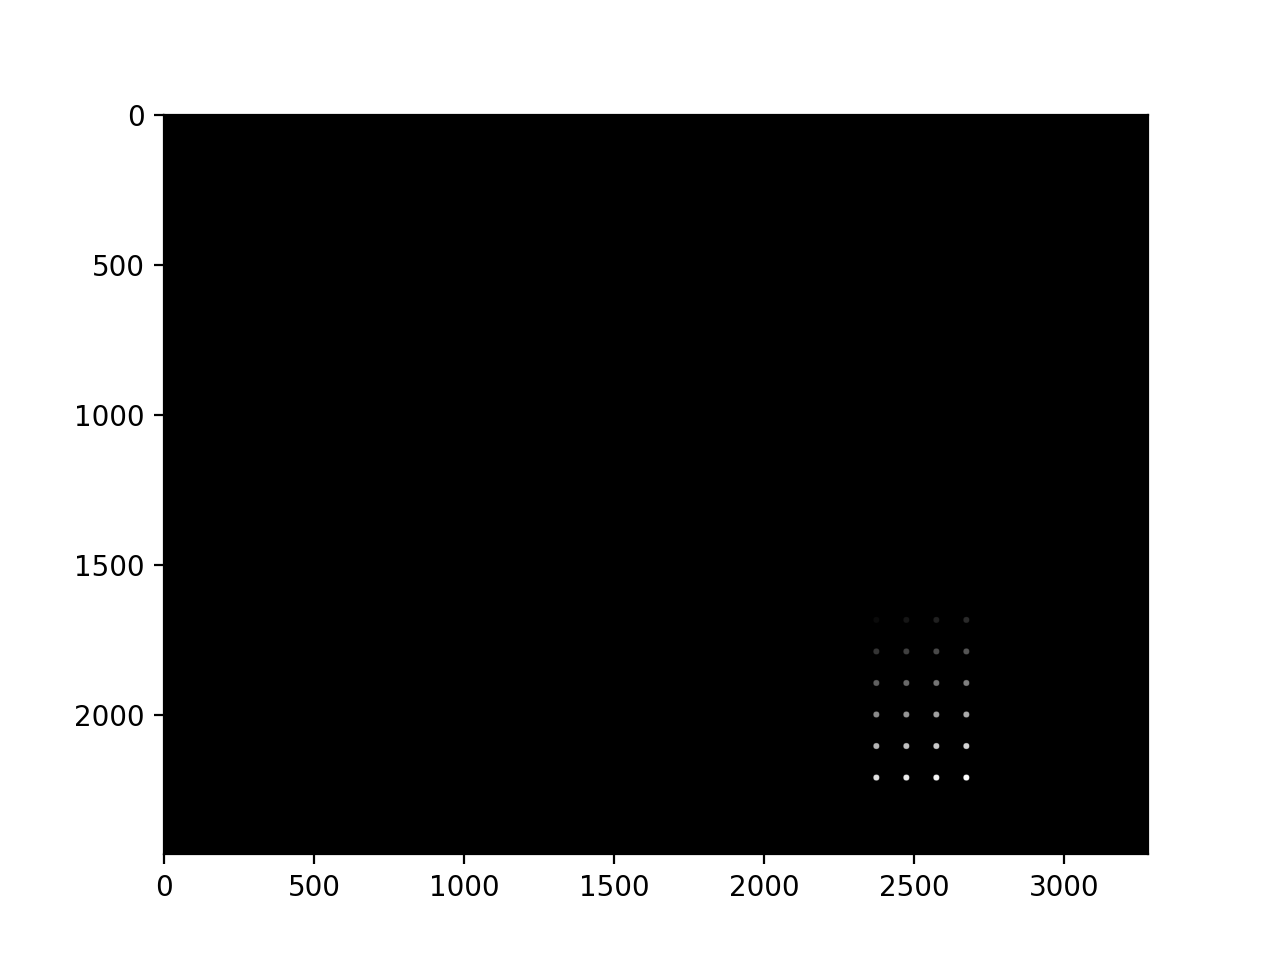

In [8]:
#Create color card mask. Note that color card coordinates are hard-coded in this example. Cross-reference this portion of the code with the automatic color card detection page if desired.

target_mask = pcv.transform.create_color_card_mask(target_img, radius=10, start_coord=(2374,1684), 
                                                   spacing=(100,105), nrows=6, ncols=4)

<IPython.core.display.Javascript object>


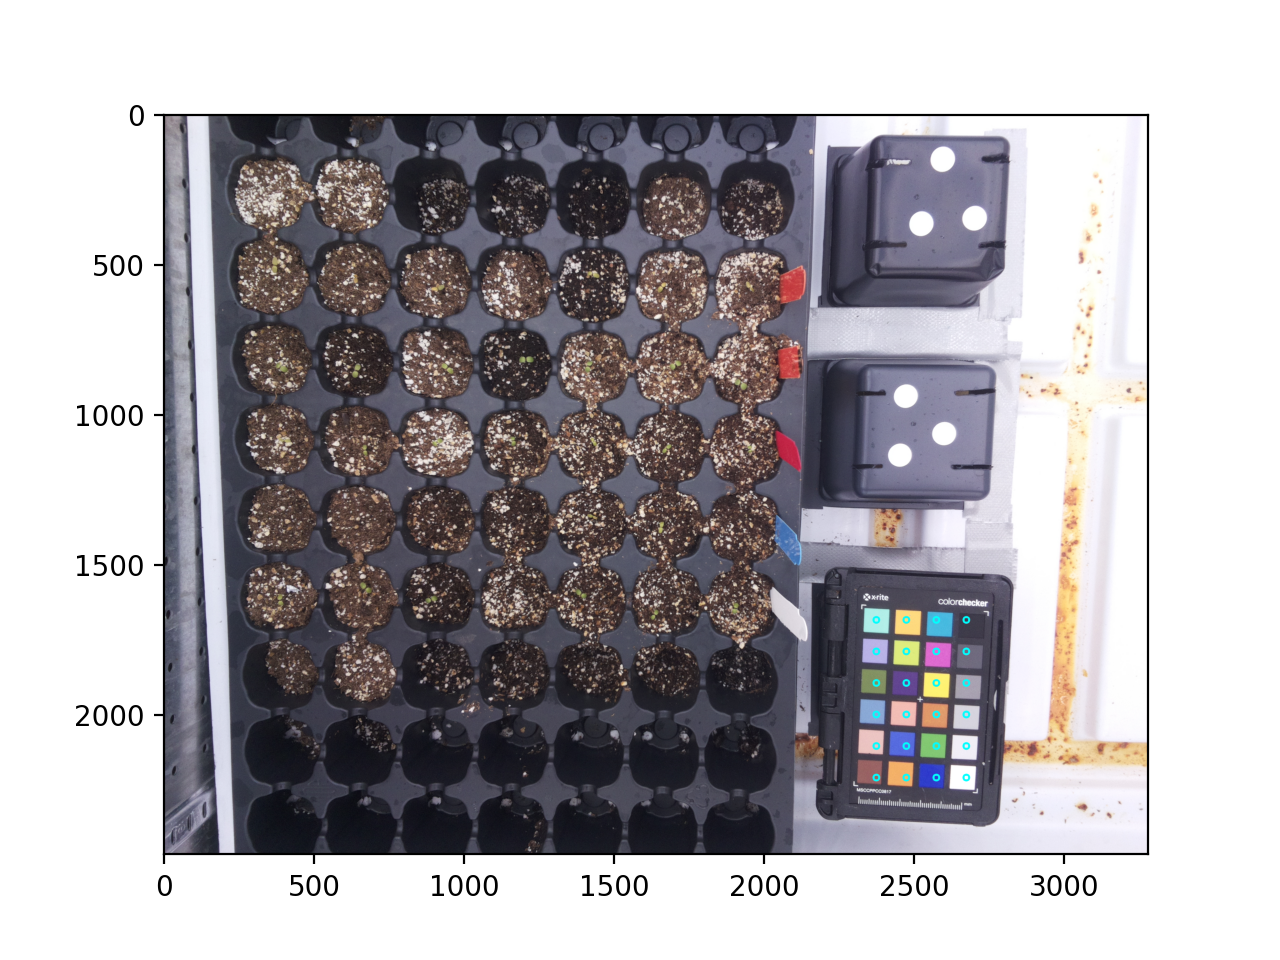

<IPython.core.display.Javascript object>


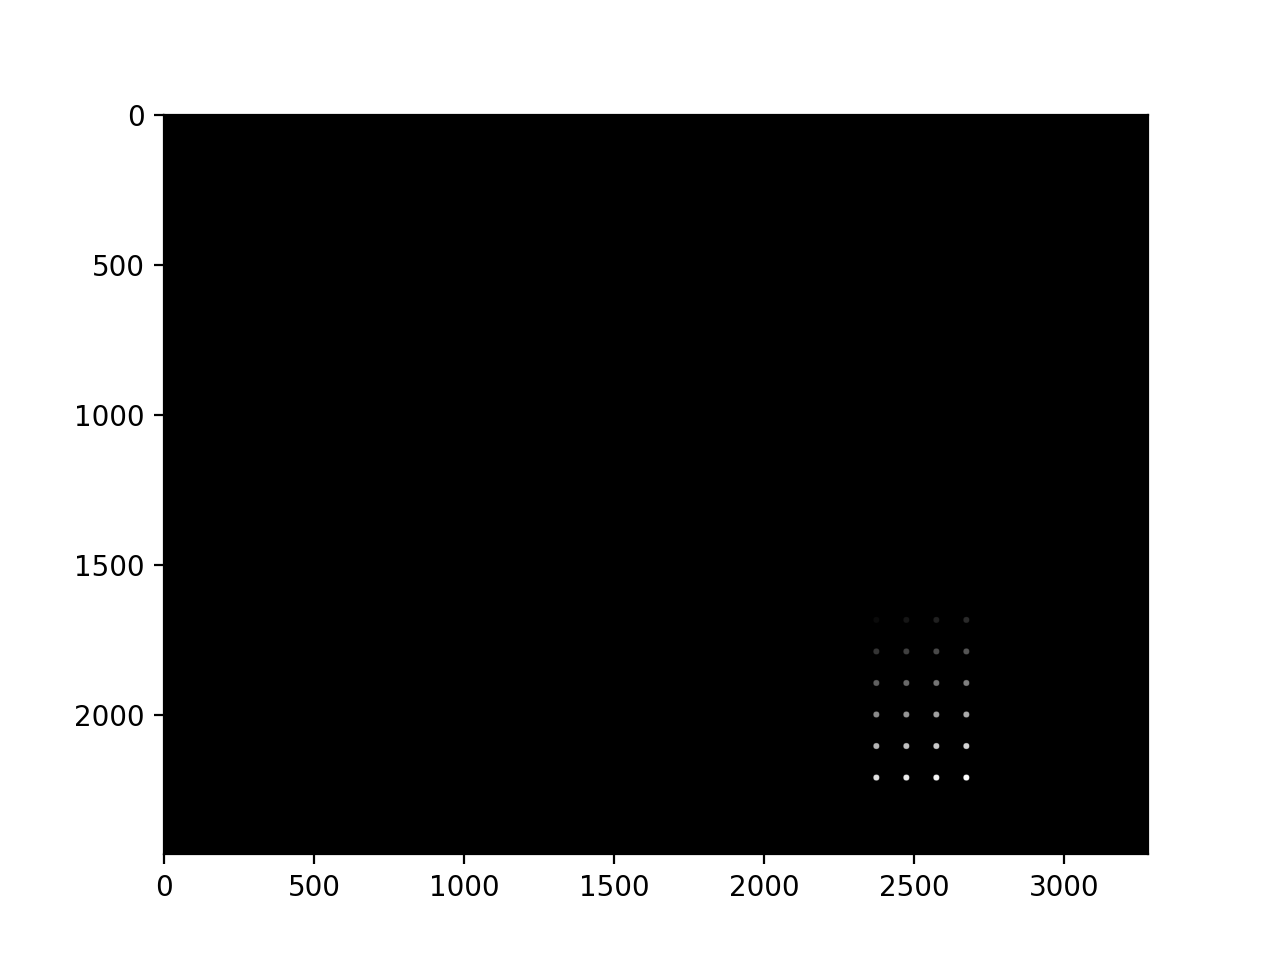

In [9]:
#Create color card mask. Note that color card coordinates are hard-coded in this example. Cross-reference this portion of the code with the automatic color card detection page if desired.

source_mask = pcv.transform.create_color_card_mask(source_img, radius=10, start_coord=(2374,1684), 
                                                   spacing=(100,105), nrows=6, ncols=4)

<IPython.core.display.Javascript object>


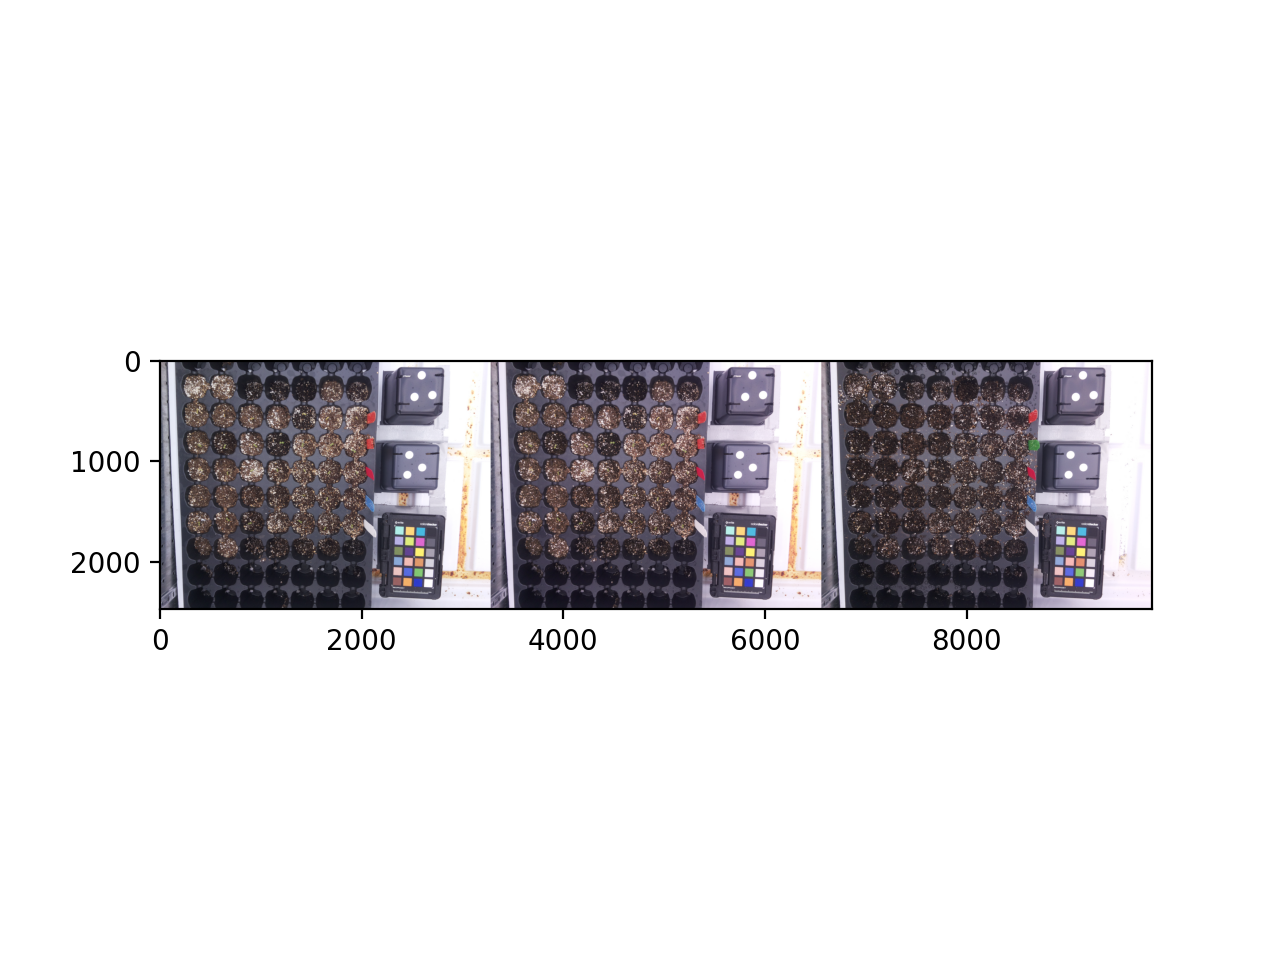

In [10]:
tm, sm, transformation_matrix, corrected_img = pcv.transform.correct_color(target_img=target_img, 
                                                                           target_mask=target_mask, 
                                                                           source_img=source_img, 
                                                                           source_mask=source_mask, 
                                                                           output_directory=args.outdir)

In [11]:
pcv.transform.save_matrix(matrix=tm, filename='./Matrix_Folder/target_matrix.npz')

<IPython.core.display.Javascript object>


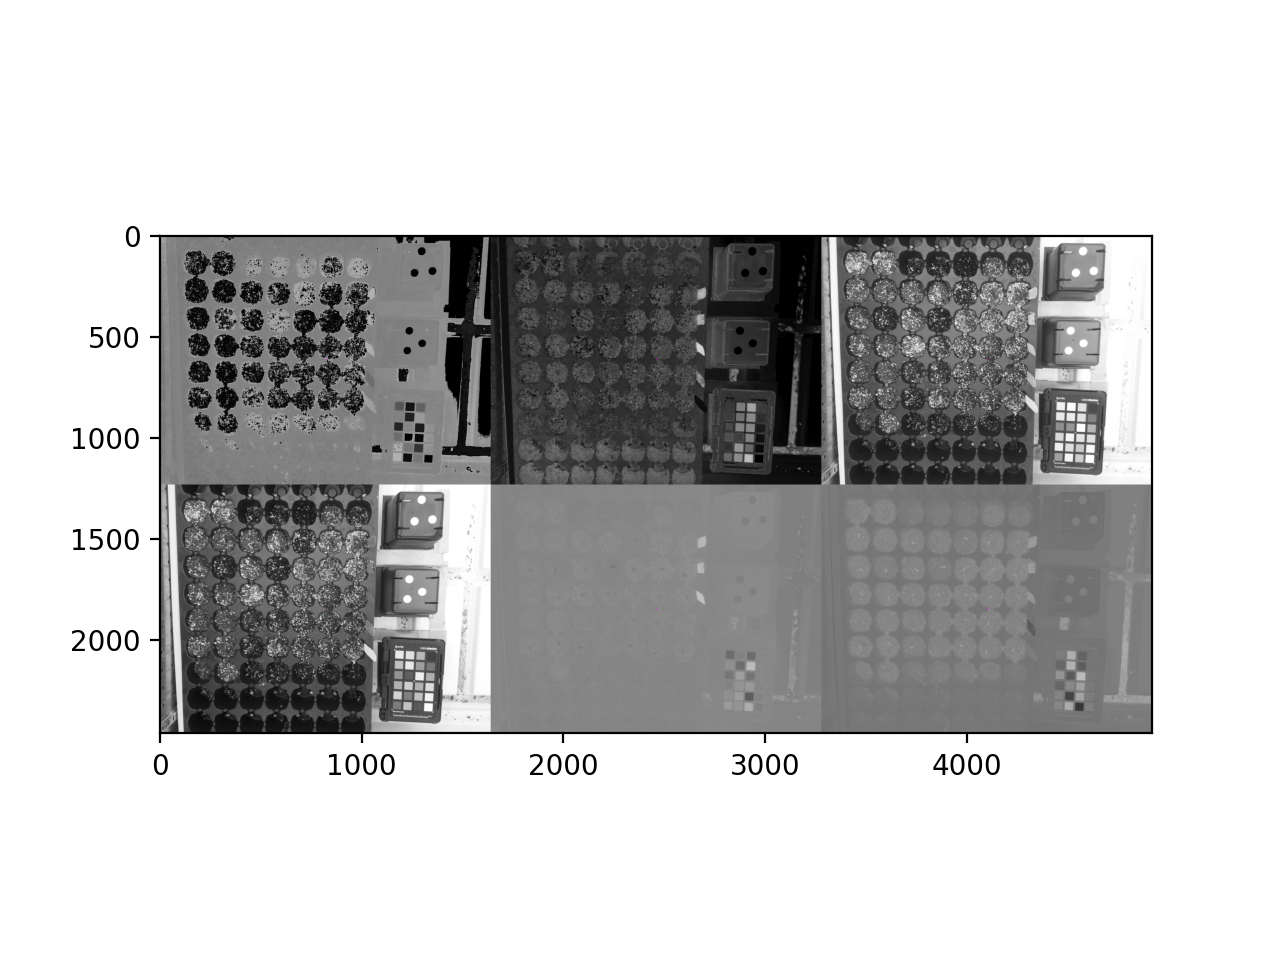

In [12]:
# Inputs:
#   corrected_img=image which has gone through the optional color correction process.
#   original_img = whether to include the RGB image in the display: 
#                  True (default) or False
#Visualize colorspaces to choose appropriate colorspace on which mask can be based

colorspaces = pcv.visualize.colorspaces(rgb_img=corrected_img, original_img=False)

<IPython.core.display.Javascript object>


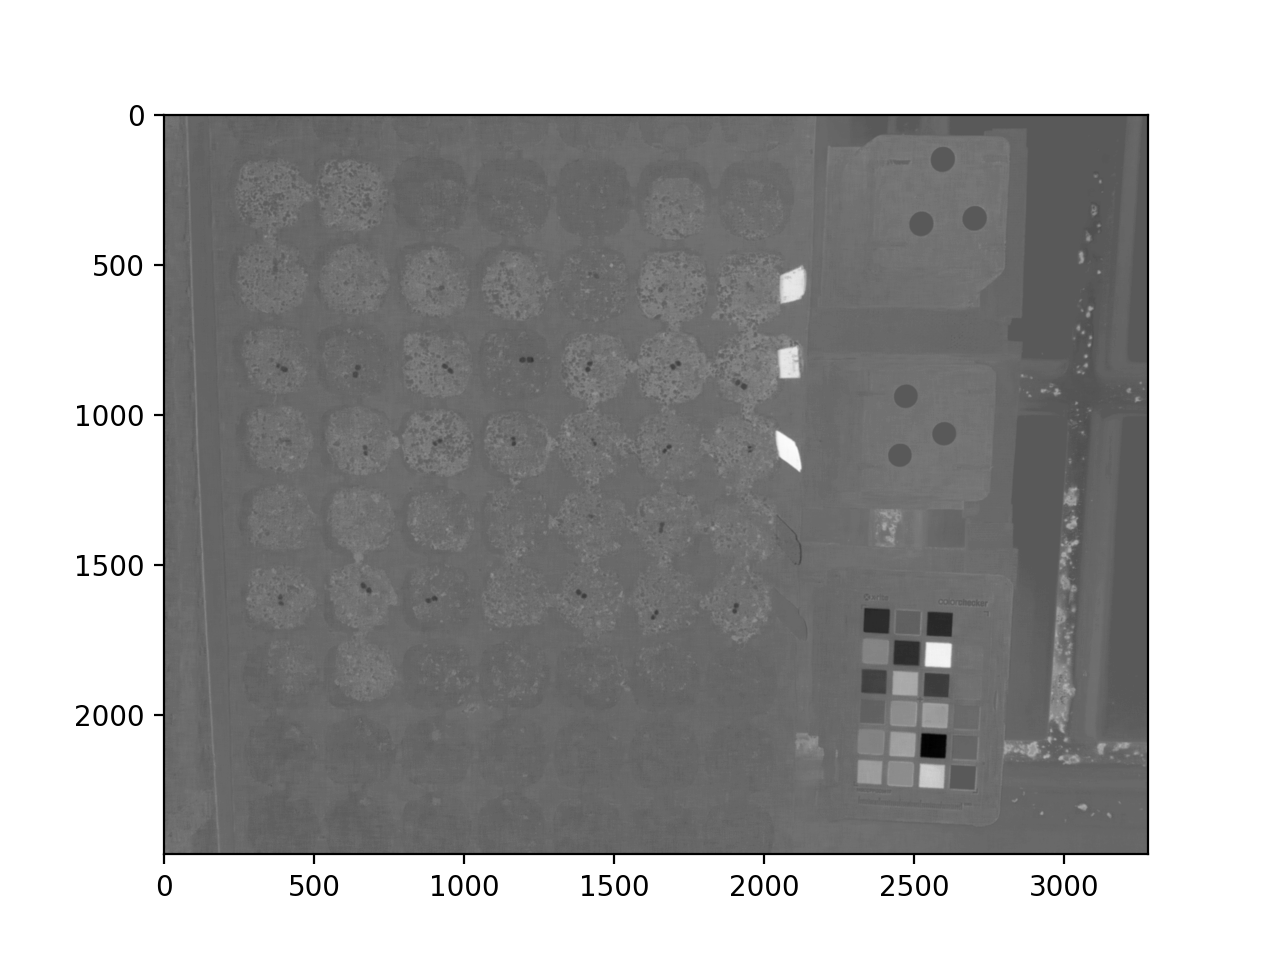

In [13]:
#Convert color image to grayscale.

a= pcv.rgb2gray_lab(rgb_img=corrected_img, channel='a')

In [15]:
#Visualize histogram to assist with thresholding. Histogram shows pixel intensity values.

hist_figure1, hist_data1 = pcv.visualize.histogram(a, hist_data=True)

alt.Chart(...)

<IPython.core.display.Javascript object>


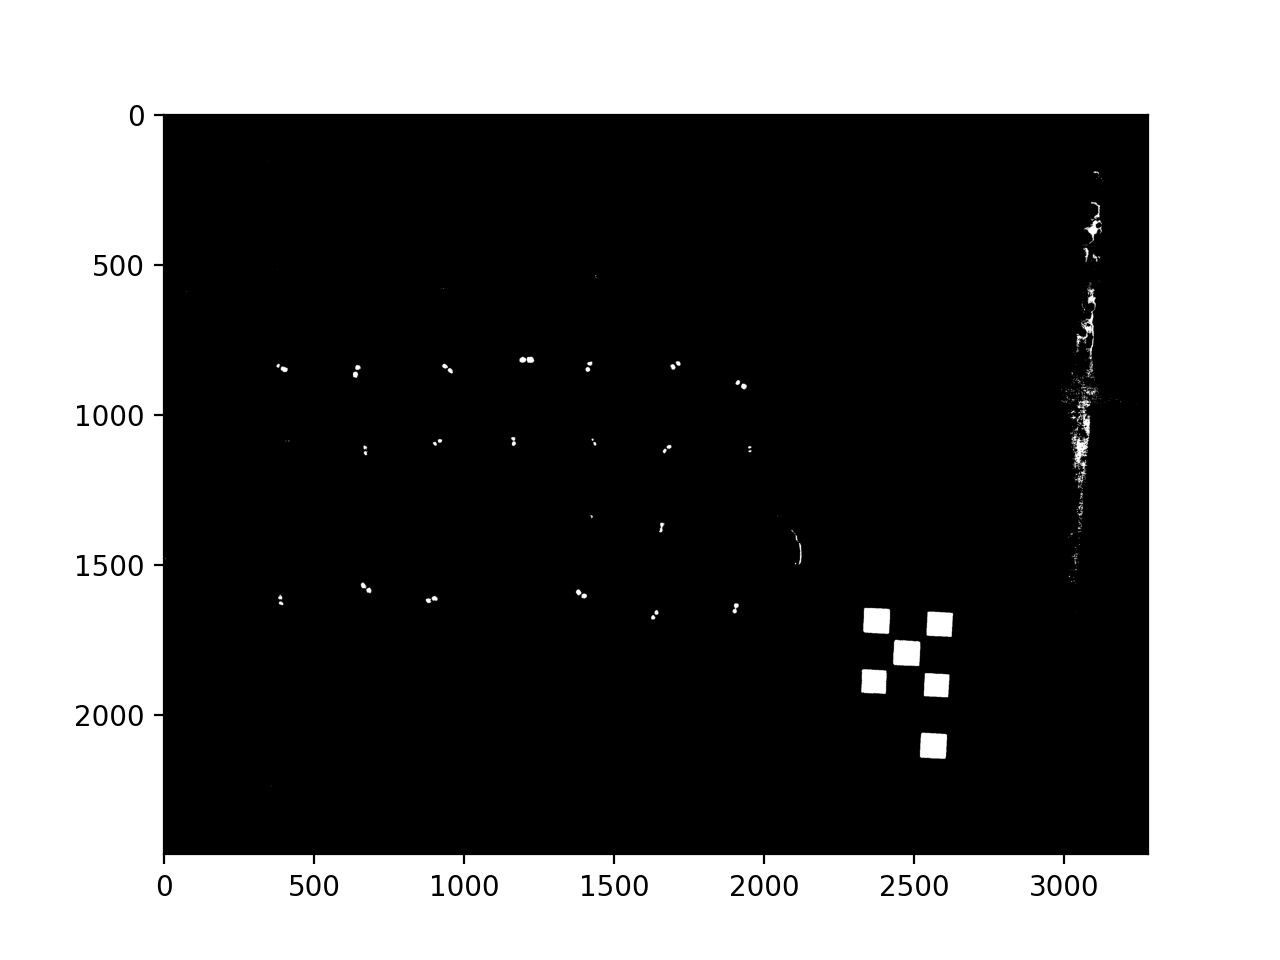

In [16]:
#Thresholding filters out pixels above a specific intensity value. This is used to create the image's mask

a_thresh = pcv.threshold.binary(gray_img=a, threshold=125, object_type='dark')

<IPython.core.display.Javascript object>


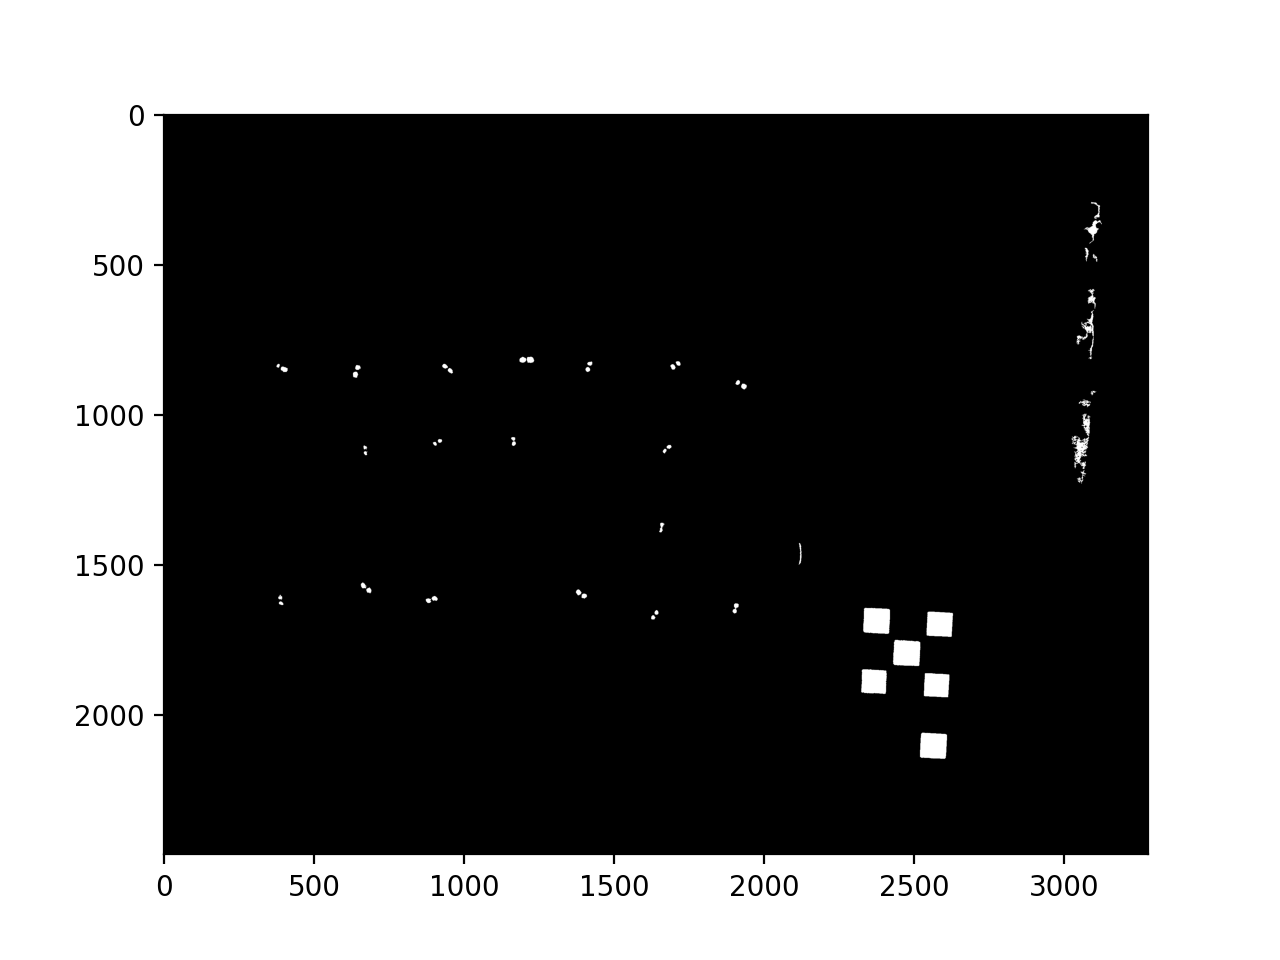

In [17]:
#Filling fills in white spots below a certian threshold in order to reduce noise in an image.

a_fill = pcv.fill(bin_img=a_thresh, size=100)

<IPython.core.display.Javascript object>


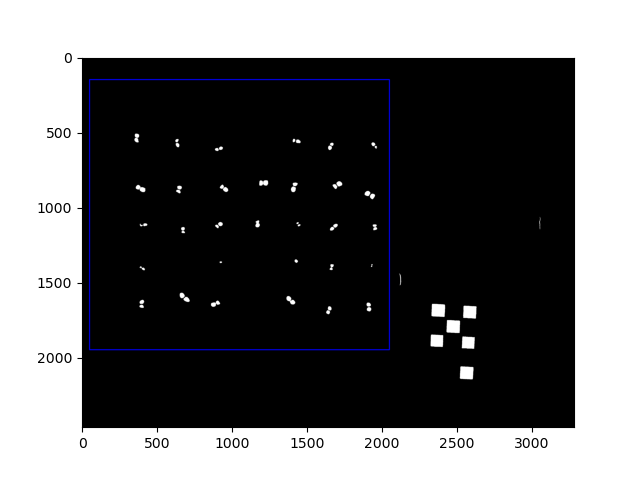

In [21]:
#Create a primary ROI to exclude non-plant items

roi1 = pcv.roi.rectangle(img=a_fill, x=50, y=150, h=1800, w=2000)

<IPython.core.display.Javascript object>


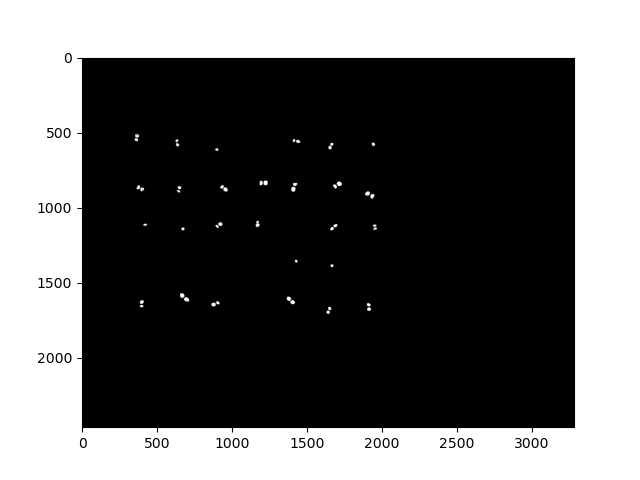

In [158]:
#Clean mask filters out everything outside primary ROI

clean_mask=pcv.roi.filter(mask=a_fill, roi=roi1)

<IPython.core.display.Javascript object>


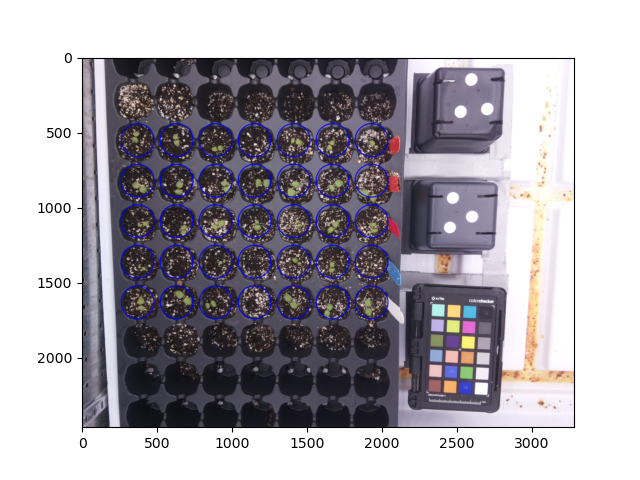

In [159]:
#Secondary ROIs are created to highlight the plants

rois = pcv.roi.multi(img=img, coord=(370,553), radius=110, 
                                      spacing=(260, 270), nrows=5, ncols=7)

In [183]:
# Create a labeled mask, this function works very similarly to the roi.filter step above

labeled_mask, num_plants = pcv.create_labels(mask=clean_mask, rois=rois, roi_type="partial")

<IPython.core.display.Javascript object>

In [3]:
#Analyze shape, size, etc of plants. 
#PlantCV counts across and down, left to right. The top row would be 1-7, the 2nd row will be 8-14, so on and so forth. 
#This is important when using multiple genotypes in one tray for RCBD or Latin Squares designs, as we did here.

shape_img = pcv.analyze.size(img=corrected_img, labeled_mask=labeled_mask, n_labels=num_plants)

NameError: name 'pcv' is not defined

In [4]:
#Analyze color of plants

analysis_image = pcv.analyze.color(rgb_img=corrected_img, labeled_mask=labeled_mask, n_labels=num_plants, colorspaces='hsv')

NameError: name 'pcv' is not defined

In [ ]:
#Save output

pcv.outputs.save_results(filename=args.result)